In [1]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()


In [2]:
# mnist = tf.keras.datasets.mnist
import input_data as ids
mnist = ids.read_data_sets('MNIST_data/', one_hot = True)


Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [3]:
mnist

_Datasets(train=<input_data._DataSet object at 0x0000027CD7EDFBB0>, validation=<input_data._DataSet object at 0x0000027CC7EAED90>, test=<input_data._DataSet object at 0x0000027CD7EF1940>)

In [4]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [5]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [6]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [7]:
mnist.validation.images.shape

(5000, 784)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

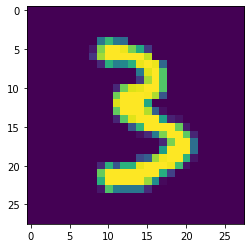

In [9]:
first_image = mnist.train.images[412]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [10]:
with tf.compat.v1.Session() as sess:
    print(tf.random.normal([784, 256]).eval())

[[-0.7037673   0.6629867   0.46696773 ... -1.3679124  -1.0801929
  -2.7204928 ]
 [ 2.106245    0.6505361   0.6415045  ...  1.2506369  -1.8512799
  -0.04853194]
 [-0.07052178  0.445871   -1.5224514  ...  0.35687867 -1.8879025
   0.07285783]
 ...
 [ 1.3965297   0.12977377  0.8946378  ... -1.4824754   0.08008336
  -0.57243156]
 [-1.7822677   0.7004312  -0.7405862  ... -1.1170849  -0.76118624
  -0.45984763]
 [-0.16809894  0.16518468 -2.090482   ... -1.0495555   0.9432159
  -0.2986625 ]]


In [11]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random.normal([n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}


In [12]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32>]

In [13]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [14]:

x = tf.compat.v1.placeholder("float", [None, n_input])
y =tf.compat.v1.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [15]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
c, _ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
c

1904.0323

In [19]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

1493